In [1]:
# standard python utilities
import os
import sys
import glob
import pandas as pd
import numpy as np
import calendar
import time

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt

# standard geospatial python utilities
import pyproj # for converting proj4string
import shapely
import geopandas as gpd
import rasterio

# mapping utilities
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [2]:
import flopy
import flopy.utils.binaryfile as bf


In [3]:
## Set up directory referencing
# Package data
git_dir = os.path.dirname(os.path.dirname(os.getcwd()))
git_dir = os.getcwd()
while os.path.basename(git_dir) != 'CosumnesRiverRecharge':
    git_dir = os.path.dirname(git_dir)
gwfm_dir = '\\'.join(str.split(git_dir,'\\')[0:3])+ '/Box/research_cosumnes/GWFlowModel'
print(git_dir, gwfm_dir)

C:\Users\ajcalder\Documents\GitHub\CosumnesRiverRecharge C:\Users\ajcalder/Box/research_cosumnes/GWFlowModel


## Plotting head raster and contours

In [4]:
ext_dir = 'F:/WRDAPP'
c_dir = 'C:/WRDAPP'

if os.path.exists(ext_dir):
    loadpth = ext_dir 
elif os.path.exists(c_dir):
    loadpth = c_dir 

loadpth = loadpth +'/GWFlowModel/Cosumnes/levee_setback/setback_distance_analysis/'
model_ws = loadpth+'Permeameter_for_velocity'

In [5]:

name = 'MF.nam'
# name = 'MF_child.nam'
m = flopy.modflow.Modflow.load(name, model_ws=model_ws, 
                                exe_name='mf2005', version='mf2005')


In [6]:
# cbb = flopy.utils.CellBudgetFile(model_ws+'/MF.upw.cbc')
cbb = flopy.utils.CellBudgetFile(model_ws+'/MF.cbc')

hdobj = flopy.utils.HeadFile(model_ws+'/MF.hds')
spd_stp = hdobj.get_kstpkper()
times = hdobj.get_times()


In [9]:
# create dates to match totim
# strt_date = pd.to_datetime(m.dis.start_datetime)
# end_date = strt_date+pd.DateOffset(months=m.dis.nper-1)
# dates = strt_date+pd.to_timedelta(zb_df.index-1, unit = 'days')

In [10]:
# create dataframe referencing between date, totim and kstp,kper
# time_spd = pd.DataFrame(np.transpose(np.array([times,spd_stp],dtype='object')),columns = ['totim','spd_stp'])
# time_spd.index = dates
# time_spd.totim = pd.to_numeric(time_spd.totim)

## Load SFR grid for buffering

In [7]:
# dem data for cropping above land surface
dem_data = np.loadtxt(gwfm_dir+'/DIS_data/dem_52_9_200m_linear.tsv')

In [8]:
grid_sfr = gpd.read_file(gwfm_dir+'/SFR_data/final_grid_sfr/grid_sfr.shp')
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Create 3D array of cells included in river setback

In [61]:
buf_sfr = grid_sfr.copy()
setbacks = np.arange(0, 3400,200)
str_setbacks = np.zeros((len(setbacks),m.dis.nrow,m.dis.ncol))
# grid_sfr.plot()
for n in np.arange(0,len(setbacks)):
    buf_sfr.geometry = grid_sfr.buffer(setbacks[n])
    grid_sfr_buf = gpd.sjoin(grid_p,buf_sfr, how='right', lsuffix = 'grid', rsuffix = 'sfr',op='within')
    grid_sfr_buf = grid_sfr_buf.drop_duplicates('node_x')
    str_setbacks[n, grid_sfr_buf.row_x.values-1,grid_sfr_buf.column_x.values-1] = 1


C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  for geom in data
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:790: DeprecationWarning: An exception was ignored while fetching the attribute

In [156]:
grid_sfr.columns

Index(['node', 'row', 'column', 'index_righ', 'z', 'easting', 'northing',
       'slope', 'Point_orde', 'length_m', 'reach', 'geometry'],
      dtype='object')

In [ ]:
# random puts them too close together 
# grid_sfr.loc[np.random.randint(0,len(grid_sfr),size=(5))].plot()
# better to pick 5 unique locations based on regional setting
# Oneto-Denier (~200), Mahon Ranch (150), Teichert (100), Rooney (80), Michigan Bar (10)
fig,ax=plt.subplots(figsize=(6,6))
grid_sfr.loc[[10, 80, 100, 150, 200]].plot('reach',ax=ax, legend=True)
ctx.add_basemap(source = ctx.providers.Esri.WorldImagery, crs = 'epsg:26910', attribution=False,ax=ax)
#

In [ ]:
np.rand(0,)

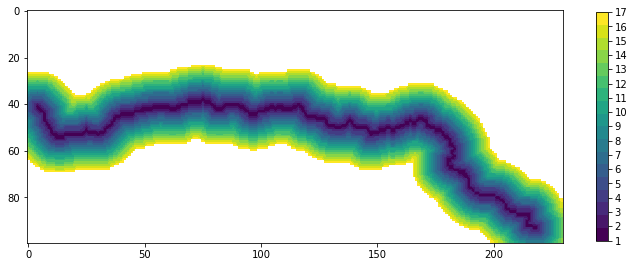

In [62]:
str_setbacks_plt = np.copy(str_setbacks)
# make non-setback cells masked
str_setbacks_plt = np.ma.masked_where(str_setbacks_plt==0, str_setbacks_plt)
# flip cumsum to make first setback 1 and last setback 10
str_setbacks_plt = (str_setbacks_plt.cumsum(axis=0)-(len(setbacks)+1))*-1
# str_setbacks_plt
fig,ax = plt.subplots(figsize=(12,6))

cmap = plt.get_cmap('viridis',len(setbacks)+1)

#doesn't work with angle
# xmin, ymin, xmax, ymax = grid_p.geometry.total_bounds
# xmax, ymax = grid_p.geometry.bounds.max().loc[['maxx','maxy']]
# xmin, ymin = grid_p.geometry.bounds.min().loc[['maxx','maxy']]

im=ax.imshow(str_setbacks_plt[-1,:,:],  cmap=cmap, origin='upper',aspect=1)
plt.colorbar(mappable = im, ax = ax, ticks = np.arange(0,len(setbacks)+1), shrink=0.7)


## Velocity Analysis
Two methods:
1. Simply count the number of cells (area/volume) at land surface within the setback
2. Count the total number of groups of cells (requires upscaling?)

In [11]:
# fig,ax = plt.subplots(figsize=(8,8))

# mapview = flopy.plot.PlotMapView(model=m,ax=ax)
# linecollection = mapview.plot_grid(linewidths = 0.1)

extcbb = flopy.utils.postprocessing.get_extended_budget(cbb)

(qx, qy, qz) = flopy.utils.postprocessing.get_specific_discharge(vectors = extcbb, model=m)
# mapview.plot_vector(qx, qy, istep=10, jstep=10)
qz *= -1
qy *= -1
qx *= -1

In [12]:
# get percentiles to determine which to plot
qz_quants = np.percentile(qz, [0,25,50,75,99,99.9])
qz_quants

array([0.02073447, 0.08407731, 0.09596906, 0.11246872, 0.20386947,
       0.36971602])

Percent of high flow cells 50.0
Percent of high flow cells 25.0


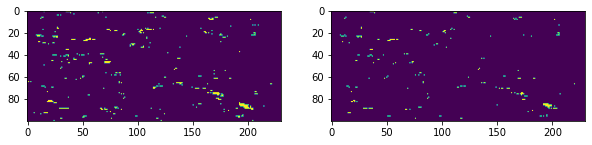

In [38]:
# going from 50 to 75th percentile identifies the same locations, but includes less cells
# go with 75th to aim for higher flows and then cells will be almost more identified into groups
fig,ax =plt.subplots(1,2,figsize=(10,5))
qz_plt = np.zeros(qz.shape)
qz_plt[qz>=np.percentile(qz,[50])] = 1
print('Percent of high flow cells',qz_plt.sum()/(100*230*320)*100)
ax[0].imshow(qz_plt[0,:,:])

qz_plt = np.zeros(qz.shape)
qz_plt[qz>=np.percentile(qz,[75])] = 1
print('Percent of high flow cells',qz_plt.sum()/(100*230*320)*100)

ax[1].imshow(qz_plt[0,:,:])

In [192]:
# Add local path to sys.path for importing scripts
# sys.path.append(git_dir+'/01_python_scripts')
# sys.path

In [13]:
def elev_to_tprogs_layers(elev, tprogs_top_elev, tprogs_bot_elev, num_lays):
    """
    function to get the tprogs layers based on the given elevation
    Example
    layer 0 is 80 meters, layer 1 is 79.5 meters, layer -1 is -80 meters
    """
    lay_thick = (tprogs_top_elev - tprogs_bot_elev)/num_lays
    elev_round = np.round((elev) * (1/lay_thick)) / (1/lay_thick) # dem rounded to the layer thickness
    elev_round[elev_round >= tprogs_top_elev] = tprogs_top_elev# any elevation above the top is set to the top
    # subtract the calculated row from top elev divided by layer thickness to get to index 0 at top and index 320 and bottom
    elev_indices = tprogs_top_elev/lay_thick - elev_round*(1/lay_thick) 
    return(elev_indices.astype(int))

In [16]:
# tprogs_cleaning.get_tprogs_for_elev(dem_data)
tprogs_lay = elev_to_tprogs_layers(elev=dem_data,tprogs_top_elev=80, tprogs_bot_elev=-80, num_lays=320)
# elev_to_tprogs_layers?

In [32]:
rows = np.where(np.ones(tprogs_lay.shape)==1)[0]
cols = np.where(np.ones(tprogs_lay.shape)==1)[1]

Using 50th percentile means 50% would be connected and 75th would mean 25% are connected; but sand and gravel take up 24% of the domain volume (by TPROGs) so this should be the upper limit of cells connected, at least the 76th percentile must be used. And according to the paper by Thomas on 3D connectivity only 13% are needed for connection, so the actual value of connected cells should be less than 24% but greater than 13%. The 85th percentile seems to be a good alternative to look for truly the most high flow.

The mean length for gravel and sands is 1300 and 1100 m in the X direction and 450 m in the Y direction (general setback) direction. Initially plotting for 1 realization seems to show and increase in slope after 400m, suggesting mean lengths are a good indicator for setback distances and that setback should be at least the mean length at the 85th percentile, increasing the percentile to 95th showed a bigger increase in slope at 1000m. It may be worth testing this hypothesis for the 85th and 95th percentile.

In [73]:
from time import time

In [ ]:
   # get high conductivity at ground surface
    qz_plt = np.zeros((100,230))
    qz_plt[rows,cols] = qz[tprogs_lay[rows,cols],rows,cols] 
    
    # split cells into low and high conductivity, based on chosen flow percentile
    qz_lay = np.zeros((100,230))
    qz_lay[qz_plt >= np.percentile(qz_plt,95)] = 1
    
    # calculate total flow at land surface through high flow cells
    # velocity is m/day, area is 200m  x 200m
    qz_net[r] = np.sum(qz_plt*(200*200))

In [144]:
tic = time()
# will count total number of cells for each setback distance and for all 100 realizations
hf_tot = np.zeros((100,len(setbacks)))
qz_net = np.zeros((100))
flow_percentile = 85
for r in np.arange(0,100):
    print('Realization', r, ' time since start ',(time()-tic)/60)
    folder = '/realization'+ str(r).zfill(3)+'/'
    run_ws = model_ws+folder

    # iterable part
    cbb = flopy.utils.CellBudgetFile(run_ws+'/MF.cbc')
    # load velocity in z direction
    extcbb = flopy.utils.postprocessing.get_extended_budget(cbb)

    (qx, qy, qz) = flopy.utils.postprocessing.get_specific_discharge(vectors = extcbb, model=m)
    # convert flow to positive as it is all moving in the downward, -z direction
    qz *= -1

   # get high conductivity at ground surface
    qz_plt = np.zeros((100,230))
    qz_plt[rows,cols] = qz[tprogs_lay[rows,cols],rows,cols] 
    
    # split cells into low and high conductivity, based on chosen flow percentile
    qz_lay = np.zeros((100,230))
    qz_lay[qz_plt >= np.percentile(qz_plt,95)] = 1
    
    # calculate total flow at land surface through high flow cells
    # velocity is m/day, area is 200m  x 200m
    qz_net[r] = np.sum(qz_plt*(200*200))
    
    for n in np.arange(0,len(setbacks)):
        hf = qz_lay[str_setbacks[n,:,:].astype('bool')]
        hf_tot[r,n] = hf.sum()

hf_tot_df = pd.DataFrame(hf_tot, columns = setbacks)
# save counted high flow cells to a csv
hf_tot_df.to_csv('surface_highflow_by_distance_'+str(flow_percentile)+'.csv', index_col=False)
toc = time()
print('Total time was', (toc-tic)/60, 'minutes')

Realization 0  time since start  1.6637643178304036e-05
Realization 1  time since start  0.02456753651301066
Realization 2  time since start  0.04904762109120687
Realization 3  time since start  0.07196067174275717
Realization 4  time since start  0.20848364035288494
Realization 5  time since start  0.33828263680140175
Realization 6  time since start  0.46950298150380454
Realization 7  time since start  0.6029173016548157
Realization 8  time since start  0.734788695971171
Realization 9  time since start  0.8646415114402771
Realization 10  time since start  0.9946491201718648
Realization 11  time since start  1.1292905608812969
Realization 12  time since start  1.2606358885765077
Realization 13  time since start  1.3920289476712544
Realization 14  time since start  1.5260780811309815
Realization 15  time since start  1.6578768968582154
Realization 16  time since start  1.787766440709432
Realization 17  time since start  1.9207533359527589
Realization 18  time since start  2.052314229806

TypeError: to_csv() got an unexpected keyword argument 'index_col'

The spread of results generally shows increasing returns for greater setback, however there is a tipping point near the mean lengths values after which maximum gains are found so setback should be slightly greater than the mean lengths in both horizontal directions. An interesting follow up analysis would be the total recharge achieved by high flow cells as a way of understanding what is needed.

In [ ]:
hf_tot_df = pd.read_csv('surface_highflow_by_distance_95.csv')
# hf_tot_melt = hf_tot_df.assign(Realization = np.arange(0,len(hf_tot_df))).\
#     melt(value_name = 'No. High Flow Cells', var_name = 'Setback Distance (m)',id_vars='Realization')

fig,ax = plt.subplots(figsize=(8,6))
hf_tot_df.transpose().plot(colormap='gray',ax=ax, legend=False)
plt.xlabel('Setback Distance (m)')
plt.ylabel('No. High Flow Cells Within Setback')
plt.title('Vertical Flow 95th percentile Cells Among 100 Realizations')
# plt.legend(ncol = 4, loc = (1.05, 0.05))

In [ ]:
hf_tot_df = pd.read_csv('surface_highflow_by_distance_85.csv')
# hf_tot_melt = hf_tot_df.assign(Realization = np.arange(0,len(hf_tot_df))).\
#     melt(value_name = 'No. High Flow Cells', var_name = 'Setback Distance (m)',id_vars='Realization')

fig,ax = plt.subplots(figsize=(8,6))
hf_tot_df.transpose().plot(colormap='gray',ax=ax, legend=False)
plt.xlabel('Setback Distance (m)')
plt.ylabel('No. High Flow Cells Within Setback')
plt.title('Vertical Flow 85th percentile Cells Among 100 Realizations')
# plt.legend(ncol = 4, loc = (1.05, 0.05))